In [1]:
from pypfopt import risk_models
from pypfopt import plotting
from pypfopt import expected_returns
from pypfopt import EfficientFrontier
from pypfopt import CLA, plotting
from pypfopt.black_litterman import BlackLittermanModel

import pypfopt

import yfinance as yf

from datetime import datetime
import matplotlib.pylab as plt
import pandas as pd

In [2]:
start_date = "2020-1-30"
tickers = ["PBW","DDOG","TWLO","FSLY","PTON","FIVN","CRWD","NVDA","ZM",
           "SE","TTD","ROKU","NET","ZS","OKTA","DOCU","SQ","NIO","FRPT","TRUP","CHWY"]
ohlc = yf.download(tickers, period="max")
prices = ohlc["Adj Close"]
prices.tail()
prices = prices[start_date:]


[*********************100%***********************]  21 of 21 completed


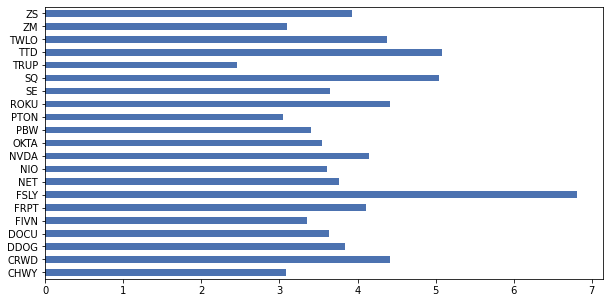

In [3]:
mu = expected_returns.capm_return(prices)
mu.plot.barh(figsize=(10,5));

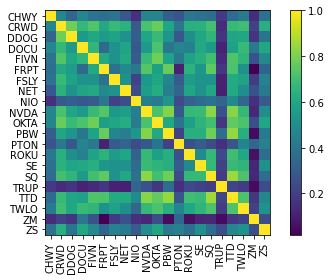

<AxesSubplot:>

In [4]:
S_semicov = risk_models.semicovariance(prices)
plotting.plot_covariance(S_semicov, plot_correlation=True)

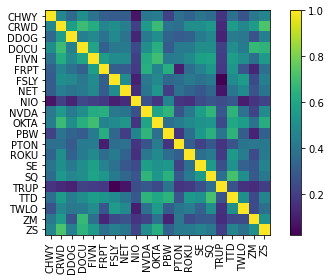

<AxesSubplot:>

In [5]:
S_expcov = risk_models.exp_cov(prices)
plotting.plot_covariance(S_expcov, plot_correlation=True)

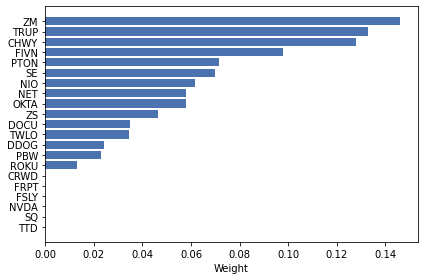

Expected annual return: 330.9%
Annual volatility: 22.5%
Sharpe Ratio: 14.63


In [24]:
from pypfopt import EfficientFrontier, objective_functions

ef = EfficientFrontier(mu, S_semicov)

ef.add_objective(objective_functions.L2_reg, gamma=0.1)  # gamme is the tuning parameter
ef.min_volatility()
weights = ef.clean_weights()
weights
plotting.plot_weights(weights)
ef.portfolio_performance(verbose=True);

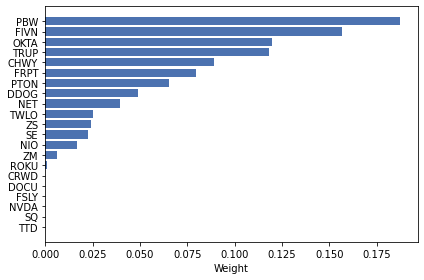

Expected annual return: 338.5%
Annual volatility: 37.7%
Sharpe Ratio: 8.93


In [23]:
from pypfopt import EfficientFrontier, objective_functions

ef = EfficientFrontier(mu, S_expcov)

ef.add_objective(objective_functions.L2_reg, gamma=0.1)  # gamme is the tuning parameter
ef.min_volatility()
weights = ef.clean_weights()
weights
plotting.plot_weights(weights)
ef.portfolio_performance(verbose=True);

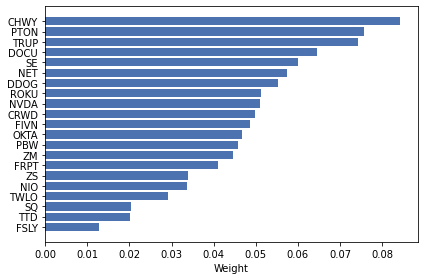

In [30]:
from pypfopt import hierarchical_portfolio
hrp = hierarchical_portfolio.HRPOpt(prices.pct_change(), cov_matrix=S_semicov)
weights = hrp.optimize()
plotting.plot_weights(weights)
hrp

In [9]:
hrp.portfolio_performance()

(1.690570961677403, 0.451141054624048, 3.702990327647191)

In [32]:
from pypfopt import DiscreteAllocation

da = DiscreteAllocation(weights, prices.iloc[-1], total_portfolio_value=310000)
alloc, leftover = da.lp_portfolio()
print(f"Leftover: ${leftover:.2f}")
alloc

Leftover: $17.26


{'CHWY': 403,
 'CRWD': 106,
 'DDOG': 151,
 'DOCU': 83,
 'FIVN': 103,
 'FRPT': 102,
 'FSLY': 44,
 'NET': 303,
 'NIO': 370,
 'NVDA': 28,
 'OKTA': 59,
 'PBW': 203,
 'PTON': 172,
 'ROKU': 70,
 'SE': 110,
 'SQ': 34,
 'TRUP': 248,
 'TTD': 10,
 'TWLO': 28,
 'ZM': 26,
 'ZS': 68}